<div class="alert alert-info"> <b>Основные цели проекта:</b> Для интернет-магазина "Стримчик" который продает компьютерные игры, необходимо выявить определяющие успешность игры закономерности. Данные знания позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании </div>

In [1]:
#Подключим необходимые библиотеки для проведения анализа
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
 df = pd.read_csv('/datasets/games.csv')

In [3]:
#Выведу полностью датасет
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
# Посмотрю информацию о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#Посмотрю какие столбцы у имеются и все ли с ними впорядке
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
#Посчитаю количество пустых значений
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
#Посмотрю на таблицу, где имеются пустые значения в столбце critic_score
df[df['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
#Посмотрю на таблицу, где имеются пустые значения в столбце user_score
df[df['User_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
#Посмотрю на таблицу, где имеются пустые значения в столбце rating
df[df['Rating'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
#Посмотрю на таблицу, где имеются пустые значения в столбце year_of_release
df[df['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
#Посмотрю какие платформы для игры имеются
df['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [12]:
#Посмотрю какие жанры игр имеем и нет ли повторений
df['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [13]:
#Посчитаю количество дубликатов
df.duplicated().sum()

0

<div class="alert alert-info"> <b>Вывод по изучению общей информации:</b> 

1) Необходимо привести к правильному типу столбец : Year of Release

2) Также нужно привести к нижнему регистру столбцы нашей таблицы, а так же сами названия колонок

3) Имеются пустые значения в столбцах rating, user_score, critic_score. Мы можем заменить имеющиеся пустые значения в таблице: year of release на года от той же игры только другой платформы, в остальных случаях решим в процессе предобработки
    
4) Дубликатов не имеется</div>

<div class="alert alert-info"> <b>2.Подготовка данных:</b> 

   1) Заменим названия столбцов (приведем к нижнему регистру);

   2) Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;
    
   3) Обработаем пропуски при необходимости;
    
   4) Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
    
   5) Опишем причины, которые могли привести к пропускам;
    
   6) Обратим внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберем это значение и опишем, как его обработать;
    
   7)Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.</div>

Заменим названия столбцов (приведем к нижнему регистру);

In [14]:
# Заменю названия столбцов (приведу к нижнему регистру) 
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [15]:
# Приведу к нижнему регистру следующие столбцы:
for column in df[['name','platform','genre','rating']]:
    df[column] = df[column].str.lower()

Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;

In [16]:
# Изменю тип данных в столбце year_of_release 
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [17]:
#Посмотрю как выглядит теперь наша таблица
df.sample(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14582,hiiro no kakera: shin tamayori hime denshou - ...,psp,2011,adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16603,satomi hakkenden: hachi tamanoki,psp,2014,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
369,fifa soccer 11,x360,2010,sports,0.71,2.39,0.02,0.40,88.0,7.5,e
12291,world poker tour,xb,2005,misc,0.05,0.01,0.00,0.00,63.0,7.8,t
10032,nba jam 2002,gba,2002,sports,0.08,0.03,0.00,0.00,49.0,tbd,e
3753,rune factory: a fantasy harvest moon,ds,2006,role-playing,0.35,0.01,0.14,0.03,78.0,8.1,e
16220,1/2 summer +,psp,2013,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
9987,fifa soccer,psp,2005,sports,0.11,0.00,0.00,0.01,73.0,7.7,e
8408,time and eternity,ps3,2012,role-playing,0.06,0.03,0.06,0.02,42.0,5,t
1586,watch dogs,x360,2014,action,0.72,0.41,0.01,0.11,NaN,5,m


Обработаем пропуски при необходимости:

In [18]:
# Посчитаю количество пустых значений в столбце year_of_release
df['year_of_release'].isna().sum()

269

In [19]:
#Напишу цикл где будем делать замену на года тех у кого совпадает название с игрой но в графе year_of_release пусто
for i in df[df['year_of_release'].isnull() == True].index:  
    df['year_of_release'][i] = df.loc[df['name'] == df['name'][i], 'year_of_release'].max()

In [20]:
#Посмотрим сколько удалось заполнить пустых значений
df['year_of_release'].isna().sum()

146

Обратим внимание на аббревиатуру tbd в столбцах с рейтингом. Отдельно разберем это значение и опишем, как его обработать.


Аббревиатура tbd значит to be determined, to be done. То есть, данные были нарочно не заполнены, так как не определились с рейтингом. Поэтому предлагаю заменить tbd на Nan

In [21]:
#Заменю tbd на Nan
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)

In [22]:
# Поменяю формат столбца user_score на float
df['user_score'] = df['user_score'].astype(float)
df['user_score'].dtype

dtype('float64')

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [23]:
#Создам новый столбец total_sales и прибавлю продажи всех столбцов
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [24]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


<div class="alert alert-info"> <b>Вывод по подготовке данных:</b> 
    
   1) Необходимо привести к правильному типу столбец : Year of Release
    
   2)Также нужно привести к нижнему регистру столбцы нашей таблицы, а так же сами названия колонок
    
   3)Имеются пустые значения в столбцах rating, user_score, critic_score. Мы можем заменить имеющиеся пустые значения в таблице: year of release на года от той же игры только другой платформы, в остальных случаях решим в процессе предобработки
    
   4)Дубликатов не имеется</div>

<div class="alert alert-info"> <b>3.Проведем исследовательский анализ данных: </b> 

1) Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    
2)Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    
3)Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы.
    
4)Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
    
5)Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
    
6)Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
    
7)Соотнесем выводы с продажами игр на других платформах.
    
8)Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?</div>

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

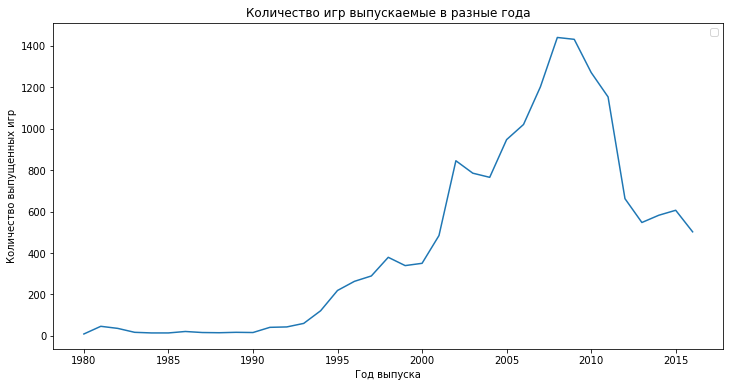

In [25]:
# Методом pivot отсортирую таблицы и отрисую график, чтобы просмотреть как менялось количество выпускаемых игр
games_on_period = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=games_on_period)
plt.title("Количество игр выпускаемые в разные года")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('')

<div class="alert alert-info"> <b>Вывод по графику:</b> 
    
    1) Из графика видно, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. 
    2) С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, виден резкий спад консольных игр.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы.

Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

Text(0, 0.5, 'Количество продаж')

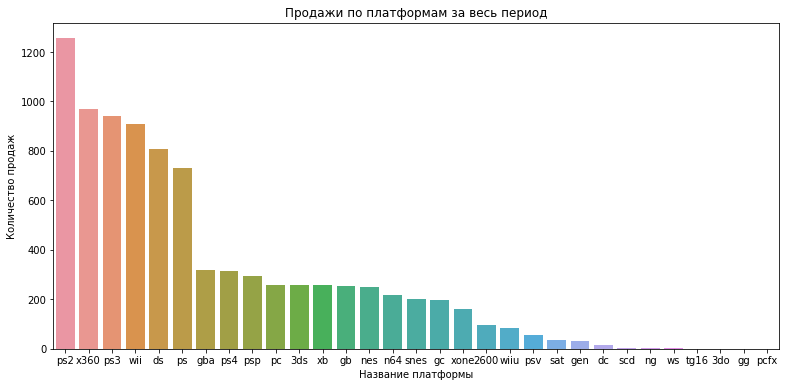

In [26]:
platform_on_sales = df.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(13,6))
sns.barplot(x=platform_on_sales.index,y=platform_on_sales['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

<div class="alert alert-info"> <b>Вывод по графику :</b> 
    
    Из графика видно, что самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS</div>

In [27]:
# Напишу функцию, которая будет возвращать нужную сводную таблицу и выводить данные с 2005 года
def year_total_sale_for_platform(name, data):
    return df[(data['platform']==name) & (data['year_of_release']>2005)].pivot_table(
        index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)

In [28]:
# Создам свою таблицу по платформам и их обшим продажам. отсортирую их по убыванию и оставлю только топ 5.
top_5_platforms = df.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)

In [29]:
#Выведу топ 5 продаваемых платформ
top_5_platforms

,platform,total_sales
0,ps2,1255.77
1,x360,971.42
2,ps3,939.65
3,wii,907.51
4,ds,806.12


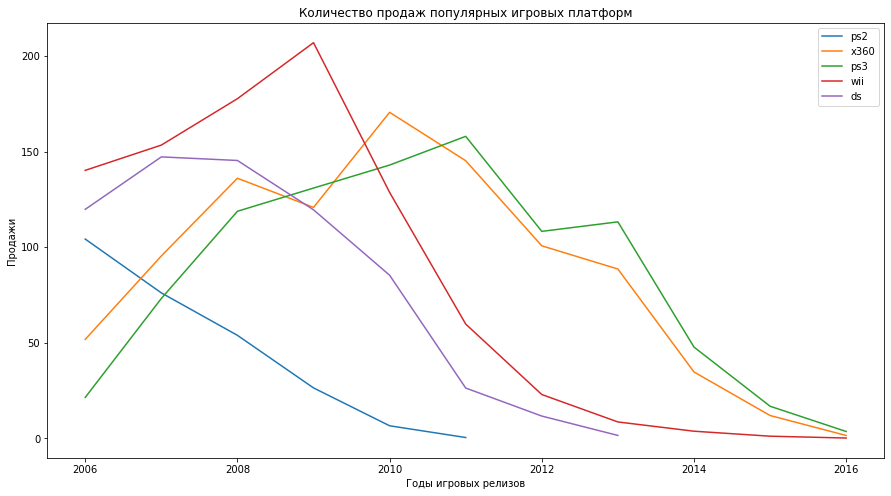

In [30]:
#Отрисую все игровые платформы и их поведение за последние 10 лет
plt.figure(figsize=(15,8))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in list(top_5_platforms['platform']):
    sns.lineplot(data=year_total_sale_for_platform(i,df)['total_sales'], label=i)
    plt.legend()

<div class="alert alert-info"> <b>Вывод по графику:</b> 
    
    -Практически все игровые платформы в среднем существуют по 10 лет. 
    - Cамые продаваемые это Sony Play Station и XBOX 
    - Самый пик наступает примерно через 5 лет после выхода приставки
    - у Nintento WII был быстрый скачок в 2009 году и такой же резкий провал

In [31]:
def year_total_sale_for_platform(na, da):
    return df[(da['platform']==na) & (da['year_of_release']>=2013)].pivot_table(
        index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)

In [32]:
actual_platforms = df.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10)
actual_platforms = actual_platforms.reset_index().rename_axis(None, axis=1)

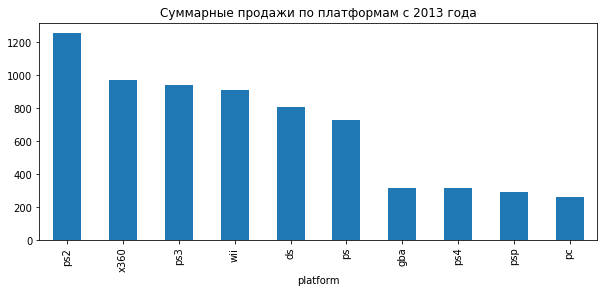

In [33]:
actual_platforms.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(figsize=(10,4),kind="bar",title='Суммарные продажи по платформам с 2013 года')

In [34]:
df = df[df['year_of_release'] >= 2013]
data_plat=df.pivot_table(index="platform",columns='year_of_release',values='total_sales',aggfunc=('sum'))

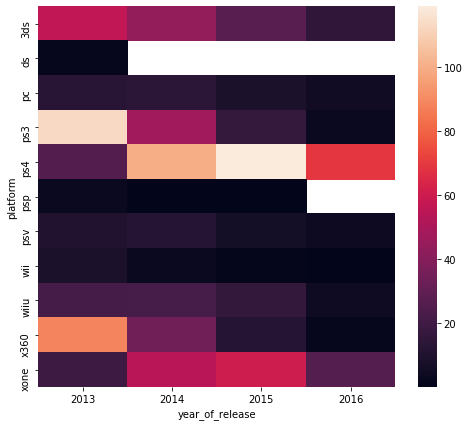

In [35]:
plt.figure(figsize=(8,7))
sns.heatmap(data_plat)

<div class="alert alert-info"> <b>Комментарий студента v_3:</b> Судя по тенденциям тепловой карты, я решил выбрать 5 платформ: xone, ps3, ps4, 3ds. ps2 я решил оставить "за бортом" , плюс уже имея платформы ps3,ps4. ps2 точно потеряет свою актуальность в 2017 году. </div>

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

In [36]:
#Сохраню в переменной df_top_5_platforms топ 5 платформ и избавимся от выбросов
list_of_top5 = ['3ds','ps3','ps4','x360','xone']
df_top_5_platforms = df[df['platform'].isin(['3ds','ps3','ps4','x360','xone'])]
df_top_5_platforms = df_top_5_platforms[df_top_5_platforms['total_sales']<1.5]

In [37]:
df_top_5_platforms['total_sales'].describe()

count    1313.000000
mean        0.271538
std         0.329016
min         0.010000
25%         0.040000
50%         0.130000
75%         0.370000
max         1.490000
Name: total_sales, dtype: float64

Text(0, 0.5, 'Глобальные продажи')

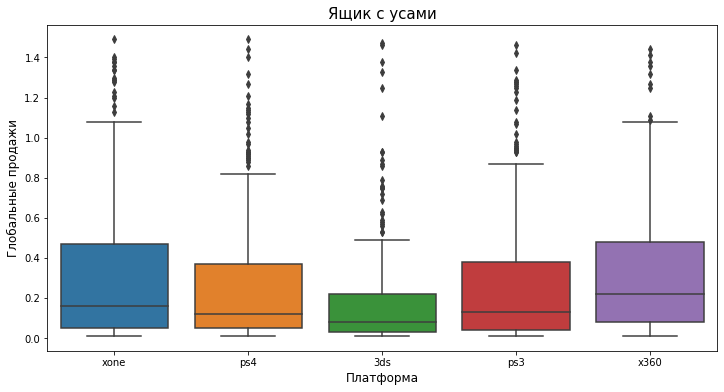

In [38]:
#Отрисую ящики с усами 
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top_5_platforms, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

<div class="alert alert-info"> <b>Комментарии студента v_3 Вывод по 'Ящик с усума':</b> Анализируя ящик с усами можно увидеть, что они похожи. за исключением платформы 3DS. У нее третий квартиль меньшем у остальных. Можно сказать, что медиана продаж у этих платформ почти одинакова. Они все скошены вправо.</div>

<div class="alert alert-info"> <b>Вывод по графику:</b> 
    
    - Провели срез данных для того, чтоыб отрисовать ящики с усами. 
    - Исходя из графиков видно, что медиана протекает у всех по разному
    - Больше всех продаж у PS3, затем X360, после xone, PS4 и 3DS на последнем месте.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

In [39]:
#Корреляция между оценками пользователей и продажами 
sony_play_station3 = df[df['platform']=='ps3']
sony_play_station3['user_score'].corr(sony_play_station3['total_sales'])

0.0023944027357566925

Text(0.5, 1.0, 'test')

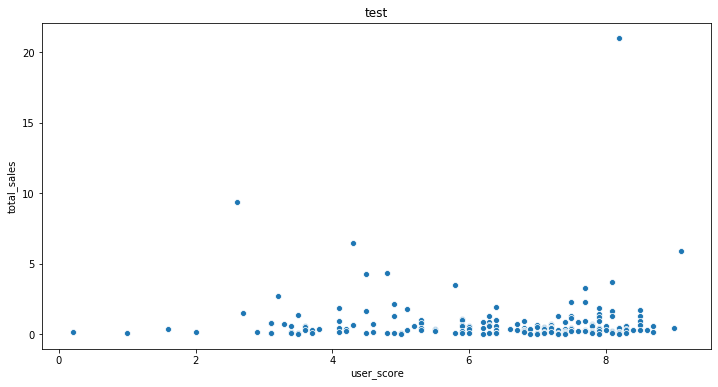

In [40]:
#Построю диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=sony_play_station3)
plt.title('test')

Text(0.5, 1.0, 'test')

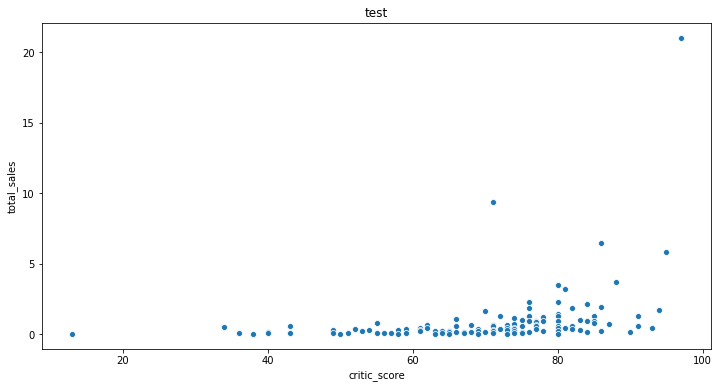

In [41]:
#Построю диаграмму рассеяния по оценкам критиков 
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=sony_play_station3)
plt.title('test')

In [42]:
#Корреляция между оценкой критиков и продажам
sony_play_station3['critic_score'].corr(sony_play_station3['total_sales'])

0.3342853393371919

Соотнесем выводы с продажами игр на других платформах.

In [43]:
#Напишу функцию, которая будет отрисовывать графики рассеивания и считать корреляции
def other_platform_matrix(name_of_platform):
    platform = df[df['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correl = platform['user_score'].corr(platform['total_sales'])
    critic_correl = platform['critic_score'].corr(platform['total_sales'])
    
    
    if 0.3 >= critic_correl >= 0.1:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Слабая', critic_correl)
    if 0.5 >= critic_correl >= 0.3:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Умеренная', critic_correl)
    if 0.7 >= critic_correl >= 0.5:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Высокая', critic_correl)
    if 0.9 >= critic_correl >= 0.7:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Весьма высокая', critic_correl)
    if 1 >= critic_correl >= 0.9:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Сильная', critic_correl)
    
    if 0.3 >= correl >= 0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая', correl)
    if 0.5 >= correl >= 0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная', correl)
    if 0.7 >= correl >= 0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая', correl)
    if 0.9 >= correl >= 0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Весьма высокая', correl)
    if 1 >= correl >= 0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Сильная', correl)
    print('\n')

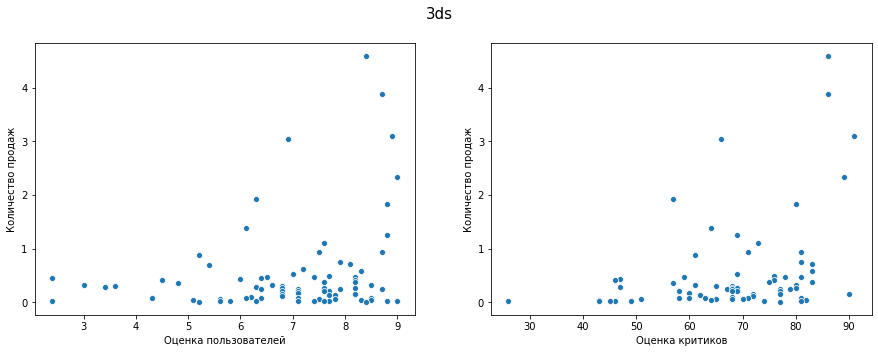

Корреляция между отзывами критиков и игровой платформой  3DS : Умеренная 0.3570566142288103
Корреляция между отзывами пользователей и продажами  3DS : Слабая 0.24150411773563016




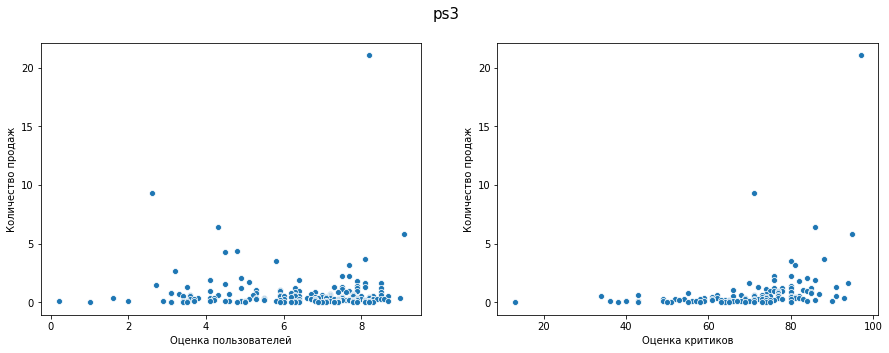

Корреляция между отзывами критиков и игровой платформой  PS3 : Умеренная 0.3342853393371919




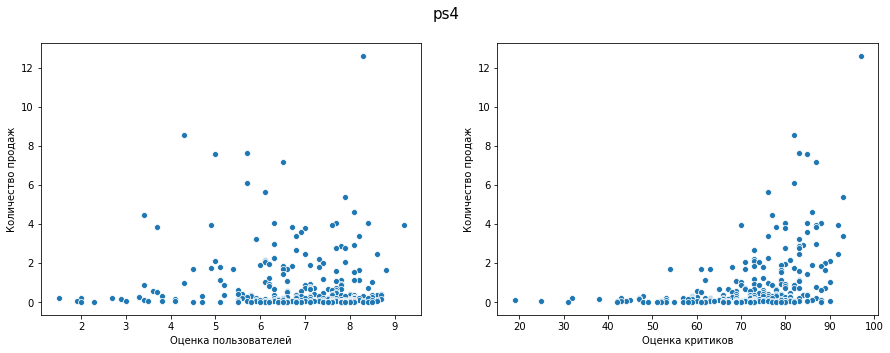

Корреляция между отзывами критиков и игровой платформой  PS4 : Умеренная 0.40656790206178095




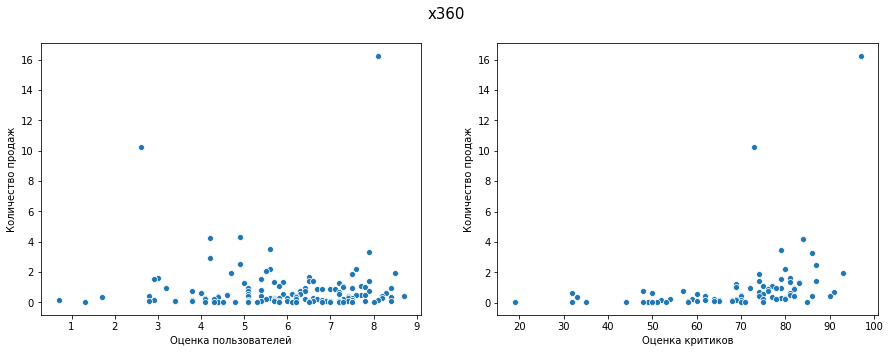

Корреляция между отзывами критиков и игровой платформой  X360 : Умеренная 0.3503445460228664




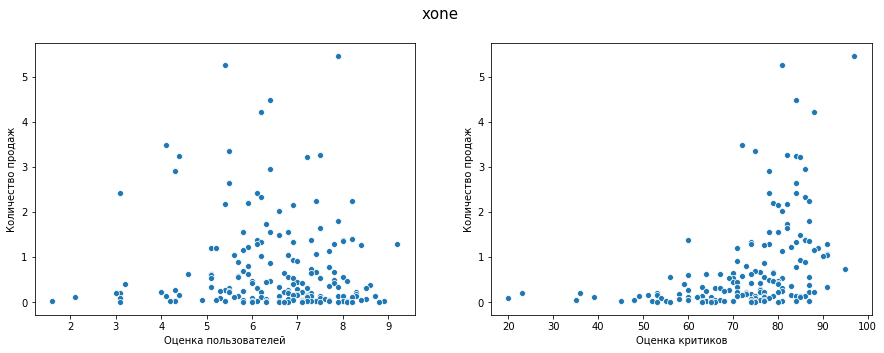

Корреляция между отзывами критиков и игровой платформой  XONE : Умеренная 0.4169983280084017




In [44]:
#С помощью цикла выведу все 5 графиков
for platform in list_of_top5:
    other_platform_matrix(platform)

In [45]:
#Посчитаю дисперсию, стандартное отклонение, среднее и медиану у топ 5 платформ к оценкам пользователей
for platform in list_of_top5:
    print('Дисперсия', platform.upper(),':', np.var(df[df['platform']==platform]['user_score']))
    print('Стандартное отклонение', platform.upper(),':', np.std(df[df['platform']==platform]['user_score']))
    print('Среднее',platform.upper(),':',  df[df['platform']==platform]['user_score'].mean())
    print('Медиана',platform.upper(),':',  df[df['platform']==platform]['user_score'].median())
    print('\n')

Дисперсия 3DS : 2.3385609375
Стандартное отклонение 3DS : 1.5292354094448637
Среднее 3DS : 6.9762499999999985
Медиана 3DS : 7.300000000000001


Дисперсия PS3 : 3.212067291016303
Стандартное отклонение PS3 : 1.7922241185232115
Среднее PS3 : 6.348387096774193
Медиана PS3 : 6.9


Дисперсия PS4 : 2.121796544989326
Стандартное отклонение PS4 : 1.4566387832916319
Среднее PS4 : 6.748249027237354
Медиана PS4 : 7.0


Дисперсия X360 : 2.5863846642867623
Стандартное отклонение X360 : 1.6082240715418863
Среднее X360 : 5.993006993006994
Медиана X360 : 6.2


Дисперсия XONE : 1.8965188383045526
Стандартное отклонение XONE : 1.377141546212499
Среднее XONE : 6.521428571428572
Медиана XONE : 6.8




In [46]:
#Посчитаю дисперсию, стандартное отклонение, среднее и медиану у топ 5 платформ к оценкам критиков
for platform in list_of_top5:
    print('Дисперсия', platform.upper(),':', np.var(df[df['platform']==platform]['critic_score']))
    print('Стандартное отклонение', platform.upper(),':', np.std(df[df['platform']==platform]['critic_score']))
    print('Среднее',platform.upper(),':',  df[df['platform']==platform]['critic_score'].mean())
    print('Медиана',platform.upper(),':',  df[df['platform']==platform]['critic_score'].median())
    print('\n')

Дисперсия 3DS : 169.01249752033326
Стандартное отклонение 3DS : 13.000480664972864
Среднее 3DS : 68.33802816901408
Медиана 3DS : 69.0


Дисперсия PS3 : 203.63007991257427
Стандартное отклонение PS3 : 14.269901187905061
Среднее PS3 : 70.19834710743801
Медиана PS3 : 73.0


Дисперсия PS4 : 155.28135235575712
Стандартное отклонение PS4 : 12.46119385756265
Среднее PS4 : 72.09126984126983
Медиана PS4 : 73.0


Дисперсия X360 : 237.71040999847582
Стандартное отклонение X360 : 15.417860097901908
Среднее X360 : 69.23456790123457
Медиана X360 : 74.0


Дисперсия XONE : 166.7994117853016
Стандартное отклонение XONE : 12.915084660400085
Среднее XONE : 73.32544378698225
Медиана XONE : 76.0




<div class="alert alert-info"> <b>Комментарий студента:</b> Практически у всех платформ присутствуем корреляция, между оценками пользователей и критиков к продажам.
Оценка пользователей слабо влияет на продажи, чего не скажешь о оценке критиков. Покупатели прислушиваются больше к критикам чем к оценкам других пользователей</div>

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [47]:
# Методом сводных таблиц выведу жанры и их продажи.  отсортирую по убыванию. 
distr_genre = df.pivot_table(
    index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
distr_genre = distr_genre.reset_index().rename_axis(None, axis=1)
distr_genre

,genre,total_sales
0,action,322.50
1,shooter,232.98
2,sports,150.65
3,role-playing,145.89
4,misc,63.06
5,platform,42.63
6,racing,39.89
7,fighting,35.31
8,adventure,23.64
9,simulation,21.76


Text(0, 0.5, 'Продажи')

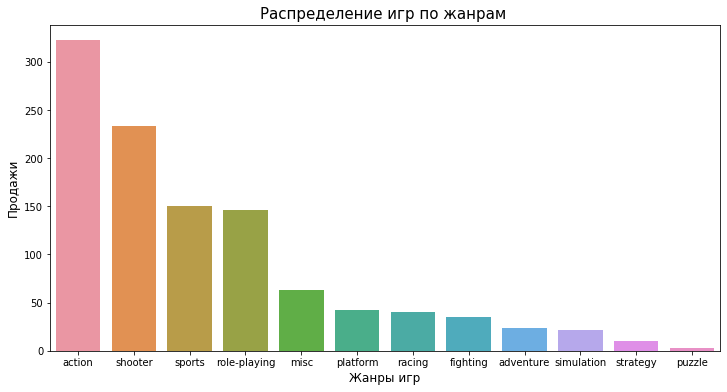

In [48]:
#Отрисую barplot чтобы наглядно посмотреть какие жанры лидирует, а какие остаются внизу
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

<div class="alert alert-info"> <b>Комментарий студента:</b>  Лучше всего продаются жанры Экшн. Стратегии как ни странно держутся на последнем месте.</div></div>

In [49]:
median_genre = df.pivot_table(
    index='genre', values='total_sales', aggfunc='median')
median_genre = median_genre.reset_index().rename_axis(None, axis=1)
median_genre

,genre,total_sales
0,action,0.110
1,adventure,0.030
2,fighting,0.125
3,misc,0.105
4,platform,0.225
5,puzzle,0.060
6,racing,0.120
7,role-playing,0.125
8,shooter,0.450
9,simulation,0.100


Text(0, 0.5, 'Продажи')

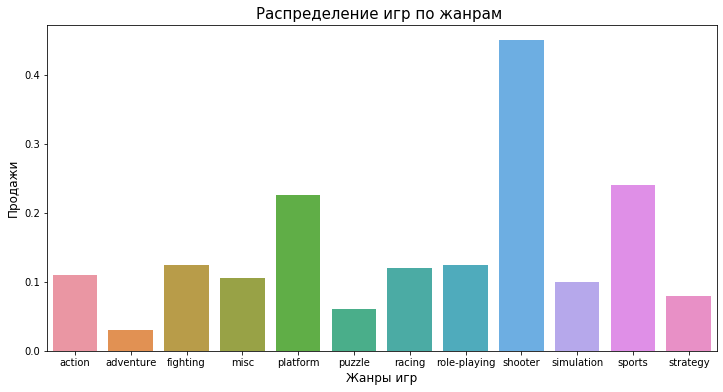

In [50]:
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=median_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

<div class="alert alert-info"> <b>Комментарий студента v_3:</b> Касаемо жанра где стабильно приносит доход попробывал методом median() но где то в кодедопустил ошибку, прошу помочь мне разобраться где я ошибся и как лучше сдлеать?</div>

<div class="alert alert-info"> <b>Вывод по исследовательскому анализу данных:</b> 
    
1) Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок игр на игровые платформы.

2) Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation.
    
3) Средняя жизнь игровой платформы составляет 10 лет. Пик продаж наступает примерно через 5 лет после выхода приставки.

4) Больше всего продаются игры на Sony Playstation и Xbox 360

5) Nintendo WII как быстро появился также быстро и потух. Возможно потому что появился прям перед выходом мобильных приложений и игр.

6)У всех платформ наблюдается взаимосвязь между продажами и оценками критиков и пользователей. Заметнее всего корреляция между оценками критиков и продажами. Это значит для людей мнение критиков важнее мнения других пользователей</div>

<div class="alert alert-info"> <b>4.Составим портрет пользователя каждого региона:</b> 

1) Определим для пользователя каждого региона (NA, EU, JP):
    
   a)Самые популярные платформы (топ-5). Опишем различия в долях продаж.
    
   b)Самые популярные жанры (топ-5). Поясним разницу.
    
   c)Влияет ли рейтинг ESRB на продажи в отдельном регионе?</div>

In [51]:
#Напишe функции для создания сводных таблиц и отсривоки барплотов

#Функция для создания сводбных таблиц за весь период
def forpivot(row, title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']),axes.flatten()[:3]):
        ppivot = df.pivot_table(index=pivot, values=row, aggfunc='sum'
                  ).sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n') 
        sns.set_palette("Blues")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
        

plt.show()
sns.set()

#Функция для создания сводных таблиц за последний год
def for_pivot_2016(row, title):
    temp = df[df['year_of_release']>2015]
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']), axes.flatten()[:3]):
        ppivot = temp.pivot_table(index=pivot, values=row, aggfunc='sum').sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n')
        sns.set_palette("BuGn_r")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)

Портрет пользователя North America

  platform  na_sales
0      ps4    108.74
1     xone     93.12
2     x360     81.66
3      ps3     63.50
4      3ds     38.20



          genre  na_sales
0        action    126.13
1       shooter    109.74
2        sports     65.27
3  role-playing     46.40
4          misc     27.49



  rating  na_sales
0      m    165.29
1      e     79.05
2   e10+     54.24
3      t     49.79





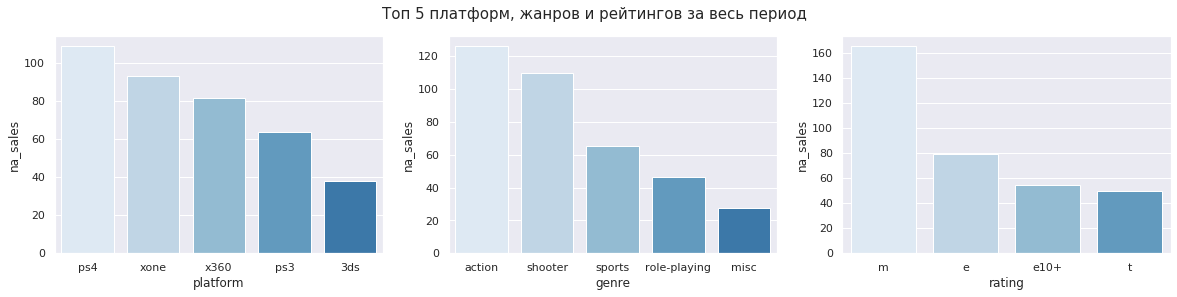

In [52]:
#Выведу топ 5 платформ, жанров и рейтингов за весь период
forpivot('na_sales','Топ 5 платформ, жанров и рейтингов за весь период')

  platform  na_sales
0      ps4     21.49
1     xone     14.27
2      3ds      4.14
3     wiiu      2.10
4       pc      1.36



          genre  na_sales
0       shooter     16.24
1        action      9.29
2        sports      7.54
3  role-playing      5.89
4      fighting      1.84



  rating  na_sales
0      m     15.67
1      t      8.95
2      e      7.97
3   e10+      3.81





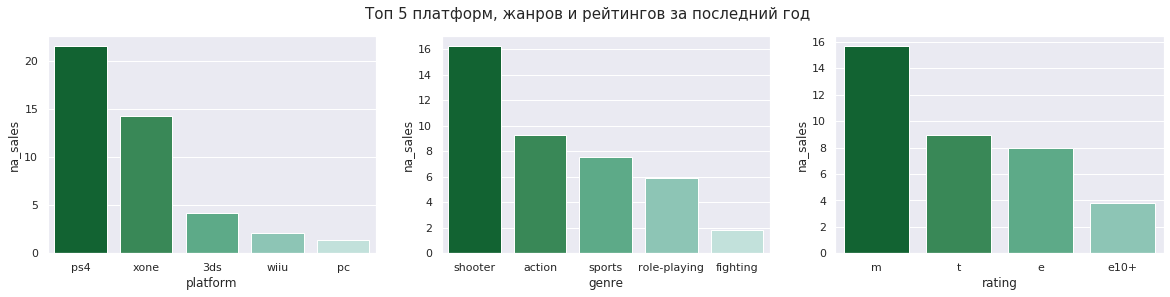

In [53]:
#Выведу топ 5 платформ, жанров и рейтингов за год
for_pivot_2016('na_sales','Топ 5 платформ, жанров и рейтингов за последний год')

<div class="alert alert-info"> <b>Вывод по пользавателям North America: </b> 
    
Самые популярные игровые платформы в северной америке за все время это: XBOX, PS2, WII, PS3, DS
    
Топ 5 жанров в северной америке за все время: action, sports, shooter, platform, misc
    
По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"
    

Если посмотреть с 2015 по 2016 года, то мы видим как интерес кардинально меняется:
    
Топ игровых приставок выглядит таким образом : PS4, Xone, DS3
    
Топ жанров игр: Shooter, Action, Sports
    
Топ рейтингов игр : "От 17 и выше" , "от 13 и выше" и "для всех"</div>

Портрет пользователя European Union

  platform  eu_sales
0      ps4    141.09
1      ps3     67.81
2     xone     51.59
3     x360     42.52
4      3ds     30.96



          genre  eu_sales
0        action    118.61
1       shooter     87.86
2        sports     60.52
3  role-playing     36.97
4        racing     20.19



  rating  eu_sales
0      m    145.80
1      e     83.36
2   e10+     42.69
3      t     41.95





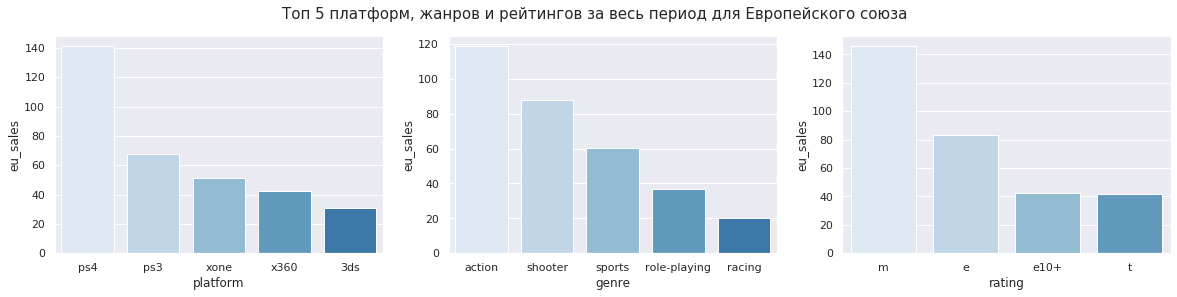

In [54]:
#Выведe топ 5 платформ, жанров и рейтингов за весь период для Европейского союза
forpivot('eu_sales','Топ 5 платформ, жанров и рейтингов за весь период для Европейского союза')

  platform  eu_sales
0      ps4     31.78
1     xone      9.63
2       pc      3.53
3      3ds      2.33
4     wiiu      1.48



          genre  eu_sales
0       shooter     15.90
1        sports     12.01
2        action     10.68
3  role-playing      4.28
4        racing      1.77



  rating  eu_sales
0      m     16.54
1      e     13.61
2      t      9.79
3   e10+      3.81





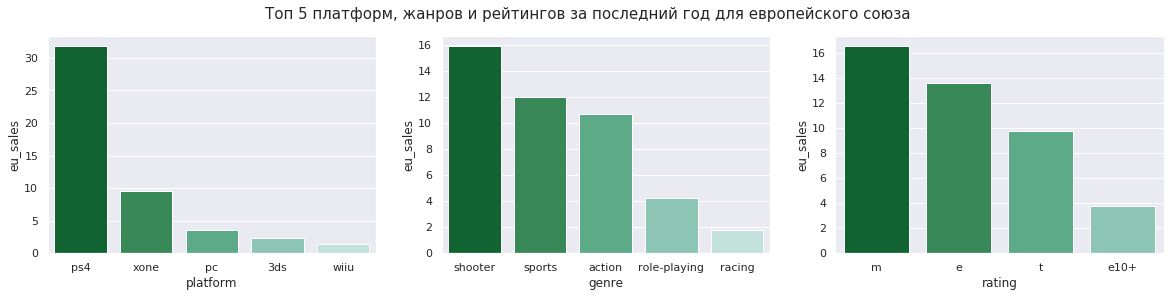

In [55]:
#Выведем топ 5 платформ, жанров и рейтингов за год для европейского союза
for_pivot_2016('eu_sales','Топ 5 платформ, жанров и рейтингов за последний год для европейского союза')

<div class="alert alert-info"> <b>Вывод по пользователям European union:</b> 
    
Самые популярные игровые платформы в Европе это: PS2, PS3, X360, WII, PS
    
Топ 5 жанров в Европе : action, sports, shooter, racing, misc
    
По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше"

За последний год интерес у пользователя кардинально изменился:
    
Топ жанров стал: shooter, sports, action
    
Топ платформ: PS4, Xone, PC
    
Топ рейтингов: "От 17 и выше" , "Для всех" и "от 13 и выше"</div>

Портрет пользователя Japanese

  platform  jp_sales
0      3ds     67.81
1      ps3     23.35
2      psv     18.59
3      ps4     15.96
4     wiiu     10.88



          genre  jp_sales
0  role-playing     51.04
1        action     40.49
2          misc      9.44
3      fighting      7.65
4       shooter      6.61



  rating  jp_sales
0      t     20.59
1      e     15.14
2      m     14.11
3   e10+      5.89





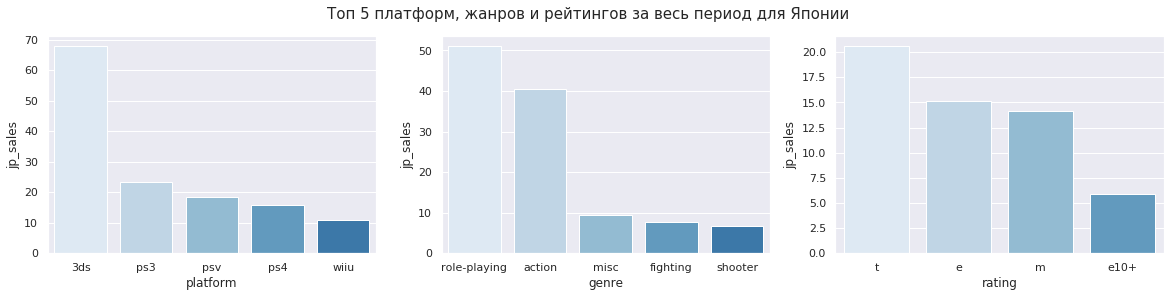

In [56]:
#Выведe топ 5 платформ, жанров и рейтингов за весь период для Японии
forpivot('jp_sales','Топ 5 платформ, жанров и рейтингов за весь период для Японии')

  platform  jp_sales
0      3ds      8.03
1      ps4      5.74
2      psv      3.56
3      ps3      1.30
4     wiiu      0.67



          genre  jp_sales
0        action      7.07
1  role-playing      6.61
2     adventure      1.18
3       shooter      1.06
4          misc      1.04



  rating  jp_sales
0      t      2.27
1      m      1.20
2      e      1.07
3   e10+      0.45





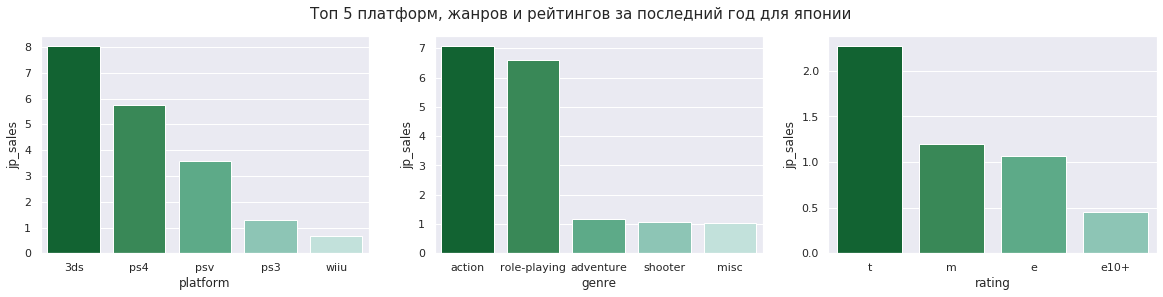

In [57]:
#Выведу топ 5 платформ, жанров и рейтингов за последний год для японии
for_pivot_2016('jp_sales','Топ 5 платформ, жанров и рейтингов за последний год для японии')

In [58]:
na_sales_ESRB=df.pivot_table(index='rating',values=['na_sales'],aggfunc=('sum'))

In [59]:
na_sales_ESRB=na_sales_ESRB.sort_values(by='na_sales',ascending=False)
na_sales_ESRB

,na_sales
rating,
m,165.29
e,79.05
e10+,54.24
t,49.79


In [60]:
eu_sales_ESRB=df.pivot_table(index='rating',values=['eu_sales'],aggfunc=('sum'))

In [61]:
eu_sales_ESRB=eu_sales_ESRB.sort_values(by='eu_sales',ascending=False)
eu_sales_ESRB

,eu_sales
rating,
m,145.80
e,83.36
e10+,42.69
t,41.95


In [62]:
jp_sales_ESRB=df.pivot_table(index='rating',values=['jp_sales'],aggfunc=('sum'))

In [63]:
jp_sales_ESRB=jp_sales_ESRB.sort_values(by='jp_sales',ascending=False)
jp_sales_ESRB

,jp_sales
rating,
t,20.59
e,15.14
m,14.11
e10+,5.89


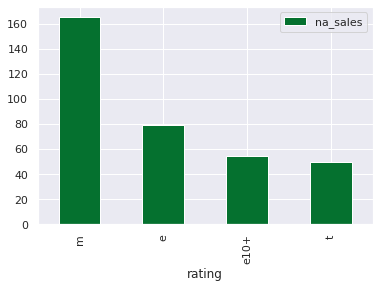

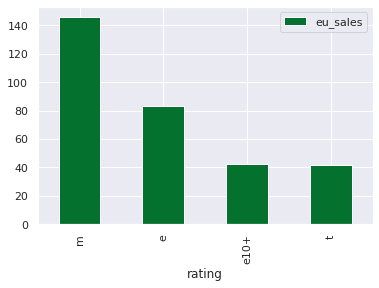

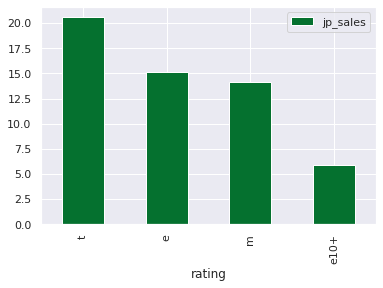

In [64]:
na_sales_ESRB.plot(kind='bar') 
eu_sales_ESRB.plot(kind='bar') 
jp_sales_ESRB.plot(kind='bar') 

<div class="alert alert-info"> <b>Комментарий студента v_4:</b> Самые популярные возрастные ограничения в С. Америке, Европе, Японии- E, T, M, E10+. Больше всего E (Для всех), затем T (для подростков 13-19 лет). Категории M (от 17) и Е+10 (10+) в Японии гораздо меньше чем в остальных регионах. Ну по сути это таже самая категория T. Остальных ограничения очень мало. Можно сделать вывод, что возрастное ограничение влияет на продажи. Т.е выпуская новый продукт нужно понимать, что большей популярностью пользуются продукты с возрастным ограничением во всех регионах E (Для всех) или T(для подростков 13-19 лет). По сути категория М и Е10+ это таже самая что и Т. Т.е можно считать, что категория Е и Т почти равны.

Анализируя будующие продажи на 2017 год можнос уверенностью сказать, что хорошие продажи можно получить у платформ '3DS','PS3','PS4','X360','XOne'. Также обратить внимание на появление новой платформы PS. Что касается жанров, то тут самые продаваемые Action, Sport, Shooter с ориентацией для подростков от 13-19 лет. </div>

<div class="alert alert-info"> <b>Вывод по пользователям Japan:</b> 
    
Cамые популярные игровые платформы в Японии это: DS, PS, PS2, SNES, 3DS
    
Топ 5 жанров в Японии : Role-Playing, action, sports, platform, misc
    
По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"

За последний год интерес у пользователя кардинально изменился

Топ Жанров: action, role-playing, adventure
    
топ платформ: 3ds, ps4, psv
    
топ рейтингов: "от 13 и выше", "от 17 и выше" и "для всех</div>

<div class="alert alert-info"> <b>Вывод по составлению портрета пользователя каждого региона: </b> 
    
1)Самые популярные игровые платформы в северной америке это: XBOX, PS2, WII, PS3, DS Топ 5 жанров в северной Америке : action, sports, shooter, platform, misc По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"

2)Самые популярные игровые платформы в Европе это: PS2, PS3, XBOX, WII, PS Топ 5 жанров в Европе : action, sports, shooter, racing, misc По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше"

3)Самые популярные игровые платформы в Японии это: DS, PS, PS2, SNES, 3DS Топ 5 жанров в Японии : Role-Playing, action, sports, platform, misc По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше"

    
    
Если брать данные за последний год:
    
    
1)То в Северной Америке:
    
топ игровых платформ выглядит так: PS4, Xone, DS3
    
Топ Жанров игр: Shooter, Action, Sports
    
Топ Рейтингов игр: "От 17 и выше" , "от 13 и выше" и "для всех"

    
    
    
    
2) В Европейском союзе:
    
Топ игровых платформ : PS4, Xone, PC
    
Топ жанров: Shooter, Sports, Action
    
Топ рейтингов: "От 17 и выше", "для всех", "от 13 и выше"

    
    
    
    
В Японии:
    
3) Топ игровых платформ : 3DS, PS4, PSV
    
Топ жанров: Action, Role-playing, Adventure
    
Топ рейтингов: "От 13 и выше", "от 17 и выше", "для всех"


    
    
Для прогноза будущих продаж лучше брать данные за последний год, так как технологии меняются с оч быстрыми темпами, и вкусы людей также могут меняться оч быстро. Соответственно, для 2017 года большую часть прибыли будут приносить игры жанра Shooter, для платформы PS4 и с рейтингом от 17 и выше</div>

<div class="alert alert-info"> <b>5.Проверим гипотезы:</b> 
    
1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    
2) Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    
3) Пороговое значение alpha зададим самостоятельно.
    
4) Поясним:
    - Как мы сформулировали нулевую и альтернативную гипотезы;
    - Какой критерий применили для проверки гипотез и почему.</div>

<div class="alert alert-info"> <b>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:</b> 
    
Сформулируем нулевые гипотезы:

1) Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    
2)Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются</div>

In [65]:
# Сохраню в переменных xbox_hyp и pc_hyp соответствующие данные (актуальные данные за последние 10 лет)
xone_hyp = df[(df['platform']=='xone') & (df['year_of_release']>2014)]['user_score']
pc_hyp = df[(df['platform']=='pc') & (df['year_of_release']>2014)]['user_score']

#Посчитаю средний рейтинг пользователя для xbox платформ
xone_hyp.mean()

6.542148760330578

In [66]:
#Посчитаю средний рейтинг пользователя для PC платформ
pc_hyp.mean()

6.296428571428573

In [67]:
#Выполню проверку гипотезы. Буду использовать метод ttest_ind

alpha = .01

results = st.ttest_ind(xone_hyp.dropna(), pc_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-info"> <b>вывод:</b> 
    Значение p-value равно чуть меньше 4%. Таким образом, не получилось опровергнуть Нулевую гипотезу. То есть, с вероятностью в 4% можно получить различность рейтингов двух платформ

<div class="alert alert-info"> <b>Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные:</b> 
    
Сформулируем нулевые гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые
    
Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются</div>

In [68]:
# Сохраню в переменных genre_action_hyp и genre_sports_hyp соответствующие данные с пользовательскими оценками
genre_action_hyp = df[(df['genre']=='action') & (df['year_of_release']>2014)]['user_score']
genre_sports_hyp = df[(df['genre']=='sports') & (df['year_of_release']>2014)]['user_score']

#выведу среднюю оценку по жанру экшн
genre_action_hyp.mean()

6.808290155440415

In [69]:
#Выполню проверку гипотезы. Будем использовать метод ttest_ind

alpha = .01

results = st.ttest_ind(genre_action_hyp.dropna(), genre_sports_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.97163549920592e-10
Отвергаем нулевую гипотезу


<div class="alert alert-info"> <b>вывод:</b> Получив p-value, мы отвергли Нулевую гипотезу. Таким образом, у нас практически нет вероятности получить одинакове средние рейнтинги по двум жанрам.</div>

<div class="alert alert-info"> <b>Вывод по проверке гипотез:</b> 
    
1) Гипотеза: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Нулевую гипотезу не удалось опровергнуть.
    
2) Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные". Отвергаем нулевую гипотезу.</div>

<div class="alert alert-info"> <b>Общий вывод:</b> 
    
1)Перед анализом данных, мы подготовили наши данные, привели к правильным данным столбцы, привели к нижнему регистру таблицы и сами названия колонок и Привели к правильным типам данных необходимые столбцы.
    
2) Определили, что аббревиатура TBD значит to be determined, to be done. То есть данные были нарочно не заполнены. Поэтому заменили tbd на nan для проведения дальнейшего анализа
    
3) Проведя анализ, мы выявили, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х до 2008 года. С 2008 года после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок консольных игр
    
4) За весь период консольных приставок самые популярные оказались: PS2, X360, PS3, WII, DS, PS
    
4) Также мы выявили, что средняя продолжительность жизни игровой приставки составляет порядка 10 лет. Самый пик продаж наступает примерно через 5 лет после выпуска консоли
    
5) Исходя из анализа мы увидели, что у Nintendo WII был резкий скачок в 2009 году и такой же резкий провал. Скорее всего потому что у людей не было особого интереса к приставке, когда как под рукой всегда был смартфон с любыми играми на вкус
    
6) Проведя анализ оценок пользователей и критиков. Мы выявили, что оценки критиков и пользователей взаимосвязаны с продажами самих игр. То есть чем больше оценка критиков или пользователей, тем лучше продажа игры.
    
7) Так же определили, что самый популярный жанр за все время это Экшн. На последнем месте стратегии
    
    

После мы составили портреты пользователей каждого региона.
    
    
1) Выяснили, что в Северной америке самые популярные жанры это action, sports, shooter. Игровые приставки : XBOX, PS2 и WII. А по рейтингу игр люди предпочитают игры с рейтингами: "для всех", "от 13 и выше" и "от 17 и выше".
    
2) В Европе же, популярные жанры точно такие же как и в Северной Америке. Но приставки по предпочитают по следующей очередности: PS2, PS3, XBOX. Рейтинг игр отличается лишь вторым местом, на втором месте у них от 17 и выше, а на третьем 13 и выше.
    
3) В японии люди предпочитают игровые приставки: DS, PS, PS2. А жанры игры : Role-playing, action и sports. Рейтинг игр аналогичный Северной Америке.

    
    
    
        Исходя из всех данных предполагаем, что лучше всего продавать игры для таких приставок как Sony Playstation 4
    
        Жанр необходимо выбирать Shooter и выбирать игры с рейтингом "от 17 и выше", тогда продажи будут значительно больше, чем если продавать другие игры.